# Regresión Lineal

### Objetivos

Describir los aspectos esenciales de una tarea de predicción, y que el alumno comprenda:
* ¿Por qué predecir?
* ¿Cómo probar un modelo?
* ¿Cómo ajustar un modelo lineal y evaluar su rendimiento con y sin `sklearn`?
* ¿Cómo utilizar características múltiples, características categóricas y características de ingeniería?
* ¿Cómo elegir el orden de regresión polinómica utilizando la validación cruzada?

### Ahorro de combustible

En el negocio: **Estimamos el ahorro de combustible de los autos.** 
La gente describe un auto , se calcula el consumo de combustible estimado y pagan por ello.

Al entrar un cliente:
* Cliente: "Este es un campo muy competitivo. ¿Por qué deberíamos pagaros?"
* Dueño: "Somos muy buenos en lo que hacemos".
* Cliente: "Su competidor dice lo mismo. ¿Tiene pruebas?"

Es importante notar que:
1. **Están compitiendo contra otros modelos.**
2. **El modelo será evaluado cuantitativamente.**

Continuando con la conversación: 

* Dueño: "Hemos analizado todas las predicciones de nuestros competidores. Todas sus predicciones tienen algún error; la media de sus errores de predicción es de 5 mpg. Podemos hacerlo mejor".
* Cliente: "Ah, interesante. Demuéstrelo".
* Dueño: "Describe un coche".
* Cliente: "Un Ford F250 híbrido de 2020"
* Dueño: "No puedo predecirlo, ya que que **ese auto no está en nuestros registros**"
* Cliente: "¿De qué sirve eso?"
* Dueño: "Si pregunta por un auto antiguo, podemos predecirlo a la perfección".
* Cliente: "Y... ¿por qué pagaría por eso?"

3. **El único rendimiento que importa es el rendimiento predictivo en casos nuevos.**

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
np.random.seed(0)
%matplotlib inline

## Modelo predictivo

Queremos diseñar un modelo predictivo $/hat{f}$ para el negocio de estimación de la economía de combustible. Comenzamos con un CSV que encontramos en Internet.

In [3]:
cars = pd.read_csv("C:/Users/aochavez/OneDrive - deacero.com/Documentos/DT Activities/Modelado/data/cars.csv", na_values=["?"])

In [4]:
cars = cars.dropna()

In [5]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


Inicialmente **predecir la media de consumo en mpg**.

## Evaluación

Para evaluar un modelo, el primer paso es crearlo con un porcentaje de los datos oculto para después analizar el modelo vs los datos ocultados al inicio.

In [6]:
n = len(cars)
n_holdout = int(n*0.2) 
print( f"{n} registros, ocultaremos {n_holdout}" )

#Nota: el metodo de segmentacion de conjuntos de entrenamiento-prueba llamado holdout recomienda una separación de 70%-30%/80%-20%
#por otra parte el metodo Cross-Validation recomienda separar en 5-7-10 segmentos el conjunto de entrenamiento

392 registros, ocultaremos 78


Aleatorizaremos los datos por medio de la instrución [.sample()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)

In [7]:
cars = cars.sample(len(cars))
cars_test = cars.iloc[:n_holdout]
cars_train = cars.iloc[n_holdout:]

In [8]:
cars_train.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
216,31.5,4,98.0,68.0,2045.0,18.5,77,3,honda accord cvcc
220,33.5,4,85.0,70.0,1945.0,16.8,77,3,datsun f-10 hatchback
256,20.5,6,225.0,100.0,3430.0,17.2,78,1,plymouth volare
301,34.2,4,105.0,70.0,2200.0,13.2,79,1,plymouth horizon
193,24.0,6,200.0,81.0,3012.0,17.6,76,1,ford maverick


Para crear el modelo, calcularemos la media de $MPG$

In [9]:
mean_mpg = cars_train.mpg.mean()

In [10]:
mean_mpg

23.50796178343949

In [11]:
fhat = lambda X: np.ones(len(X))*mean_mpg  # Modelo

In [12]:
yhat = fhat(cars_test) # Predecir la media para cada auto

In [13]:
yhat

array([23.50796178, 23.50796178, 23.50796178, 23.50796178, 23.50796178,
       23.50796178, 23.50796178, 23.50796178, 23.50796178, 23.50796178,
       23.50796178, 23.50796178, 23.50796178, 23.50796178, 23.50796178,
       23.50796178, 23.50796178, 23.50796178, 23.50796178, 23.50796178,
       23.50796178, 23.50796178, 23.50796178, 23.50796178, 23.50796178,
       23.50796178, 23.50796178, 23.50796178, 23.50796178, 23.50796178,
       23.50796178, 23.50796178, 23.50796178, 23.50796178, 23.50796178,
       23.50796178, 23.50796178, 23.50796178, 23.50796178, 23.50796178,
       23.50796178, 23.50796178, 23.50796178, 23.50796178, 23.50796178,
       23.50796178, 23.50796178, 23.50796178, 23.50796178, 23.50796178,
       23.50796178, 23.50796178, 23.50796178, 23.50796178, 23.50796178,
       23.50796178, 23.50796178, 23.50796178, 23.50796178, 23.50796178,
       23.50796178, 23.50796178, 23.50796178, 23.50796178, 23.50796178,
       23.50796178, 23.50796178, 23.50796178, 23.50796178, 23.50

Encontremos el MSE:

In [14]:
mse = ((cars_test.mpg - yhat)**2).mean()
mse #este mse es el que se tiene que mejorar con los modelos que se sigan construyendo

62.176568371213904

Es una estimación muy general pero satisface dos requisitos importantes:

* Es una métrica de error cuantitativa y comparable,
* Ha sido calculada sobre datos nuevos.

Los modelos sencillos como éste se denominan **modelo base**; son muy útiles para establecer un límite inferior en el rendimiento de modelos más complejos.

Aunque el MSE es matemáticamente elegante, puede ser difícil de interpretar. También es habitual fijarse en la raíz cuadrada del MSE (RMSE), que tiene las mismas unidades que la variable objetivo.

In [15]:
mse**0.5

7.88521200547036

Este número puede interpretarse como la distancia que el modelo tiene de la media.  Así que en promedio (aproximadamente, 1 desviación estándar o menos lejos), nuestra estimación de 24 mpg está fuera de la mpg real en nuestros datos de prueba por 8 mpg.

## El Álgebra de la regresión lineal


Las mpg (y) pueden modelarse como una función del peso del vehículo (X) por medio de la ecuación linal:

$$/hat{y_i} = mx_i + b$$

Que puede expresarse como:

$$/hat{y} = X/beta$$

Donde:
* $/hat{y_i}$ es el i-ésimo $/hat{y}$
* $x_i$ es la i-ésima fila de $X$
* $/beta$ es $(m,b)$

In [16]:
X = np.stack( [cars_train.weight.values, np.ones_like( cars_train.weight )] ).T
y = cars_train.mpg.values

In [17]:
X[:5]

array([[2.045e+03, 1.000e+00],
       [1.945e+03, 1.000e+00],
       [3.430e+03, 1.000e+00],
       [2.200e+03, 1.000e+00],
       [3.012e+03, 1.000e+00]])

In [18]:
y[:5]

array([31.5, 33.5, 20.5, 34.2, 24. ])

In [20]:
beta = np.linalg.inv(X.T @ X) @ X.T @ y
beta

array([-7.72555665e-03,  4.64474768e+01])

In [21]:
m, b = beta  #pendiente, intercección
fhat = lambda X: m*X + b

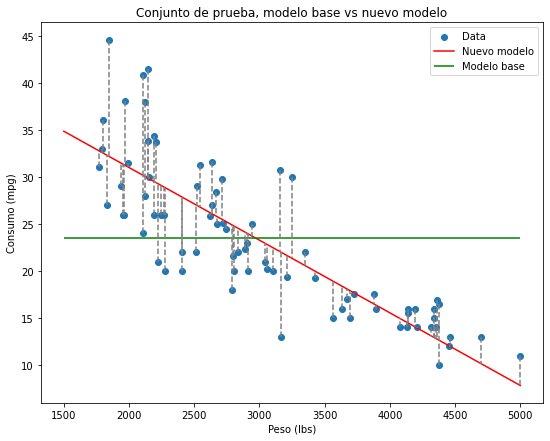

In [22]:
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter( cars_test.weight, cars_test.mpg, label="Data" )
ax.set_xlabel("Peso (lbs)")
ax.set_ylabel("Consumo (mpg)")
ax.set_title("Conjunto de prueba, modelo base vs nuevo modelo")

weights = np.linspace(1500,5000)
ax.plot( weights, fhat(weights), c="red", label="Nuevo modelo" )
ax.hlines(mean_mpg, 1500, 5000, color='green', label="Modelo base")

ax.legend()

for x_i, y_i in zip(cars_test.weight,cars_test.mpg):
    plt.plot([x_i, x_i], [y_i, m*x_i+b], color='gray', linestyle='dashed')

In [24]:
yhat = fhat(cars_test.weight)
mse = ((cars_test.mpg - yhat)**2).mean()
print(mse)
rmse = np.sqrt(mse)
print(rmse)

20.233704522903242
4.4981890270311276


Ahora el MSE ha disminuido a la mitad vs el modelo base

## Regresión lineal con múltiples predictores

A partir de la ecuación:

$$/hat{y} = X/beta$$

Es posible generalizar $X$ como una matriz de $n$ por $p+1$, en donde cada fila $i$ corresponda a una muestra, y cada columna $j$ corresponda a una característica. De esta manera $/beta$ se convierte en un vector con longitud $ p+1$.

Por lo tanto, la ecuación anterior se convierte en:

$$ /hat{y_i} = /beta_0 /cdot 1 + /beta_1x_{i,1} + /beta_2x_{i,2} + ... + /beta_px_{i,p} $$

Por ejemplo, 
* La columna 0 sería igual a 1s, 
* La columna 1 de X pertenece al peso del auto, 
* La columna 2 de X pertenece a los cc del motor.

Para este ejemplo las $/beta$ son:
* $/beta_0$ consumo "base" en mpg
* $/beta_1$ es el consumo extra por cada lb de peso
* $/beta_2$ es el consumo extra por cada cc del motor

In [25]:
X = np.stack( [np.ones_like( cars_train.weight ),
               cars_train.weight.values, 
               cars_train.displacement.values] ).T
y = cars_train.mpg.values

In [26]:
X_test = np.stack( [np.ones_like( cars_test.weight ),
               cars_test.weight.values, 
               cars_test.displacement.values] ).T
y_test = cars_test.mpg.values

In [27]:
X[:10]

array([[1.000e+00, 2.045e+03, 9.800e+01],
       [1.000e+00, 1.945e+03, 8.500e+01],
       [1.000e+00, 3.430e+03, 2.250e+02],
       [1.000e+00, 2.200e+03, 1.050e+02],
       [1.000e+00, 3.012e+03, 2.000e+02],
       [1.000e+00, 2.278e+03, 1.130e+02],
       [1.000e+00, 4.425e+03, 4.550e+02],
       [1.000e+00, 3.420e+03, 2.600e+02],
       [1.000e+00, 2.545e+03, 1.190e+02],
       [1.000e+00, 2.615e+03, 1.190e+02]])

In [28]:
# Operación con matrices para encontrar X1, X2 y X3
beta = np.linalg.inv(X.T @ X) @ X.T @ y  
beta

array([ 4.45024213e+01, -6.20848786e-03, -1.32975132e-02])

In [29]:
# Producto punto de X_text y Beta para obtener el mse
mse = ((X_test @ beta - y_test)**2).mean()
rmse = np.sqrt(mse)
print(mse)
print(rmse)

19.394298320210215
4.403895811688807


Como conclusión, agregar los cc del motor al modelo predictivo disminuye el mse y también el rmse.

## Regresión lineal con predictores categóricos

La variable `origin` corresponde al _continente_ de origen de cada vehículo en el dataset, para agregarla al modelo verifiquemos qué contiene.

In [30]:
cars.origin.value_counts()

1    245
3     79
2     68
Name: origin, dtype: int64

Parece una variable numérica pero no lo es, los códigos corresponden a Estados Unidos, Europa y Asia en orden ascendente. ¿Cómo se podría utilizar la regresión lineal con una característica que _no es un número_?

Una estrategia consiste en crear "variables ficticias" (o dummies) numéricas que codifiquen la presencia de una característica categórica con un $1$ o un $0$.

In [28]:
cars["american"] = cars.origin.map( lambda x: 1.0 if x==1 else 0.0 )
cars["european"] = cars.origin.map( lambda x: 1.0 if x==2 else 0.0 )
cars["asian"] = cars.origin.map( lambda x: 1.0 if x==3 else 0.0 )

In [29]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name,american,european,asian
146,28.0,4,90.0,75.0,2125.0,14.5,74,1,dodge colt,1.0,0.0,0.0
282,22.3,4,140.0,88.0,2890.0,17.3,79,1,ford fairmont 4,1.0,0.0,0.0
69,12.0,8,350.0,160.0,4456.0,13.5,72,1,oldsmobile delta 88 royale,1.0,0.0,0.0
378,38.0,4,105.0,63.0,2125.0,14.7,82,1,plymouth horizon miser,1.0,0.0,0.0
331,33.8,4,97.0,67.0,2145.0,18.0,80,3,subaru dl,0.0,0.0,1.0


Ahora es posible analizar si existe una relación lineal entre la variable ficticia y la variable objetivo. 
Por ejemplo, en la siguiente imagen se observa que a medida que la propiedad "Americano" de un coche se eleva a 1, la economía de combustible es menor:

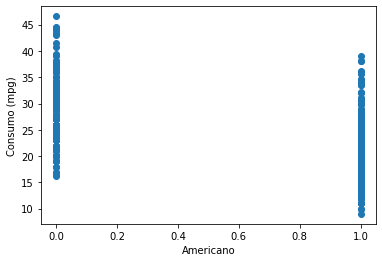

In [30]:
plt.scatter( cars.american, cars.mpg )
plt.xlabel( "Americano" )
plt.ylabel( "Consumo (mpg)");

In [32]:
# Al agregar esta variable categórica al modelo
cars_test = cars.iloc[:n_holdout]
cars_train = cars.iloc[n_holdout:]

X = np.stack( [np.ones_like( cars_train.weight ),
               cars_train.weight.values, 
               cars_train.displacement.values,
               cars_train.american.values] ).T
y = cars_train.mpg.values

beta = np.linalg.inv(X.T @ X) @ X.T @ y

X_test = np.stack( [np.ones_like( cars_test.weight ),
               cars_test.weight.values, 
               cars_test.displacement.values,
               cars_test.american.values] ).T
y_test = cars_test.mpg.values

mse = ((X_test @ beta - y_test)**2).mean()
print(mse)
rmse = np.sqrt(mse)
print(rmse)

18.823633678253355
4.338621172475578


Nuevamente se obtuvo una reducción del mse y del rmse.

# Funciones no lineales

In [33]:
# Construyamos un dataset basado en un polinomio de segundo grado

In [34]:
x1 = stats.norm(15,5).rvs(100)
offset = stats.norm(3, 1).rvs(100)
y1 = (10 * (x1 ** 2)) + offset

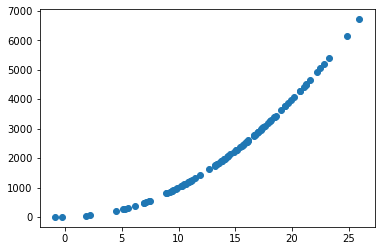

In [35]:
plt.scatter(x1, y1);

In [38]:
# Es necesario un reshape para que funcione
x1.reshape(100,1)[:10]

array([[16.80947943],
       [17.33783803],
       [ 7.4098565 ],
       [ 5.53477587],
       [11.07456734],
       [ 6.97352967],
       [22.15920114],
       [ 5.28904938],
       [20.69976697],
       [11.91417033]])

In [36]:
lr = LinearRegression().fit(x1.reshape(-1,1), y1); lr

LinearRegression()

In [37]:
lr.coef_, lr.intercept_

(array([258.38756162]), -1357.8138631302645)

Estos valores Beta son demasiado elevados si regesamos a observar el gráfico inicial.

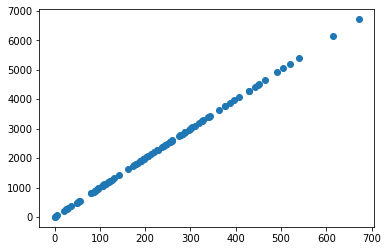

In [38]:
# Al elevar x1 al cuadrado y graficar vs y la relación se vuelve lineal
plt.scatter(x1**2, y1);

In [41]:
lr = LinearRegression().fit(x1.reshape(-1,1) ** 2, y1); lr.coef_, lr.intercept_

(array([10.0000482]), 3.1022724750068846)

Recalculando los valores Beta de $x^2$ vs $y$ obtenemos Beta y la intersección reales 

## Curvas a partir de líneas rectas

La relación entre el peso y el consumo de combustible _no es una línea recta_. Al analizarlo, el consumo de combustible en mpg de un auto nunca puede ser negativo, solamente puede llegar hasta cero

Text(0.5, 1.0, 'Peso vs. Consumo')

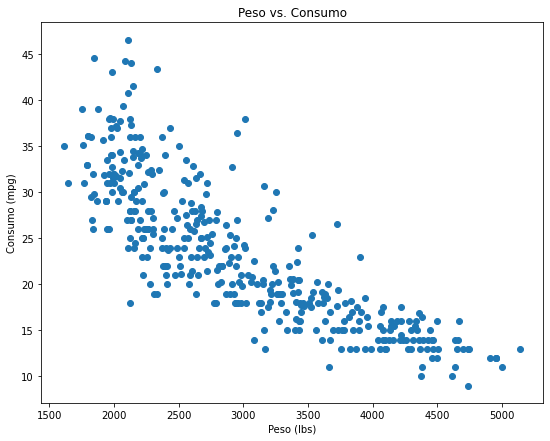

In [42]:
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter( cars.weight, cars.mpg )
ax.set_xlabel("Peso (lbs)")
ax.set_ylabel("Consumo (mpg)")
ax.set_title("Peso vs. Consumo")

Una solución es realizar una regresión lineal sobre las característas. Un modelo potencial:

$$y = /beta_0 + /frac{/beta_1}{x_{weight}}$$

puede parecer no lineal, pero es una función lineal del predictor
$/frac{1}{x_{weight}}$.

Text(0.5, 1.0, 'Peso vs. Consumo')

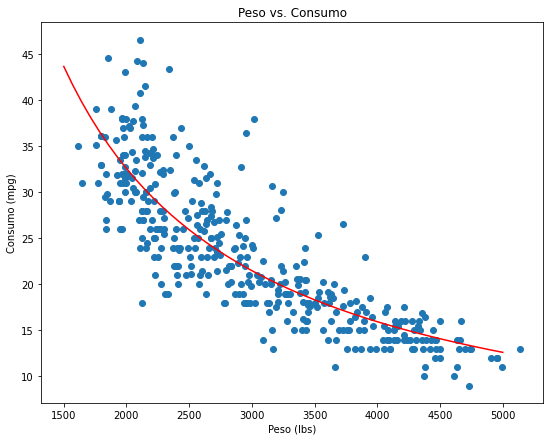

In [43]:
X = np.stack( [np.ones_like( cars_train.weight ),
               1/cars_train.weight.values] ).T
y = cars_train.mpg.values

beta = np.linalg.inv(X.T @ X) @ X.T @ y
beta

fig, ax = plt.subplots(figsize=(9,7))
ax.scatter( cars.weight, cars.mpg )
weightspace = np.linspace(1500, 5000)

ax.plot( weightspace, beta[1]*(1/weightspace)+beta[0], c="red")

ax.set_xlabel("Peso (lbs)")
ax.set_ylabel("Consumo (mpg)")
ax.set_title("Peso vs. Consumo")

Una vez calculado Beta se obtienen los mse y rmse

In [44]:
X_test = np.stack( [np.ones_like( cars_test.weight ),
               1/cars_test.weight.values] ).T
y_test = cars_test.mpg.values


mse = ((X_test @ beta - y_test)**2).mean()
print(mse)
rmse = np.sqrt(mse)
print(rmse)

19.913159670948755
4.4624163489021


Una estrategia para ajustar curvas complejas es la **regresión polinómica**, que consiste en crear características polinómicas a partir de características observadas.

Text(0.5, 1.0, 'Peso vs. Consumo')

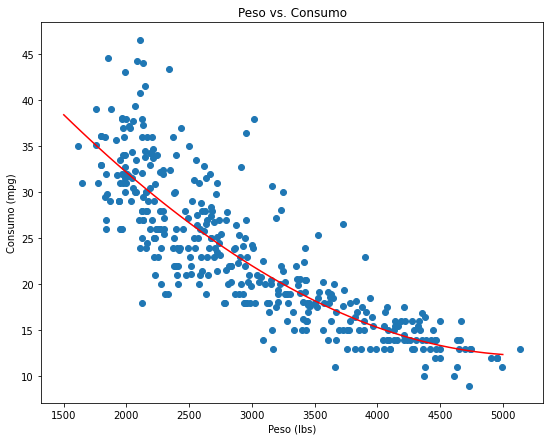

In [45]:
# Ejemplo con función cúbica

X = np.stack( [np.ones_like( cars_train.weight ),
               cars_train.weight.values**1,
               cars_train.weight.values**2,
               cars_train.weight.values**3] ).T

y = cars_train.mpg.values


beta = np.linalg.inv(X.T @ X) @ X.T @ y

fig, ax = plt.subplots(figsize=(9,7))
ax.scatter( cars.weight, cars.mpg )
weightspace = np.linspace(1500, 5000)

fake_feats = np.stack( [np.ones_like(weightspace), 
                        weightspace**1, 
                        weightspace**2, 
                        weightspace**3] ).T

ax.plot( weightspace, fake_feats @ beta, c="red")
ax.set_xlabel("Peso (lbs)")
ax.set_ylabel("Consumo (mpg)")
ax.set_title("Peso vs. Consumo")

## Validación cruzada para selección de hiperparámetros

Es posible exagerar con las características polinómicas, lo que lleva a una mala generalización en el conjunto de pruebas, por ejemplo:

Text(0.5, 1.0, 'Peso vs. Consumo')

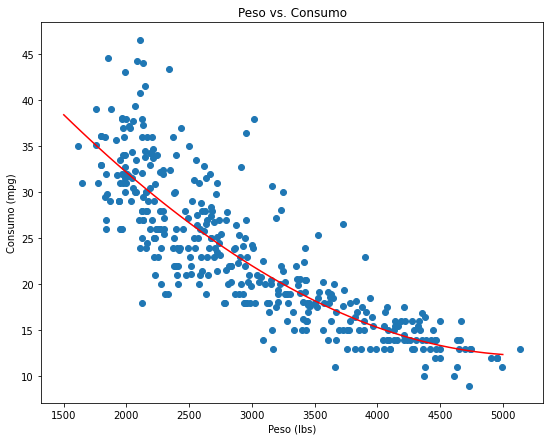

In [50]:
order = 3 # Probar con 3, 5, 8, y 10

features = [np.ones_like( cars_train.weight )]
for i in range(1,order+1):
    features.append( cars_train.weight.values**i )
X = np.stack( features ).T
y = cars_train.mpg.values

beta = np.linalg.inv(X.T @ X) @ X.T @ y

fig, ax = plt.subplots(figsize=(9,7))
ax.scatter( cars.weight, cars.mpg )
weightspace = np.linspace(1500, 5000)
fake_feats = [np.ones_like(weightspace)]

for i in range(1,order+1):
    fake_feats.append( weightspace**i )
fake_feats = np.stack( fake_feats ).T

ax.plot( weightspace, fake_feats @ beta, c="red")
ax.set_xlabel("Peso (lbs)")
ax.set_ylabel("Consumo (mpg)")
ax.set_title("Peso vs. Consumo")

Para encontrar el orden correcto se puede utilizar un rango con ciclo como en el siguiente ejemplo:

Text(0.5, 1.0, 'MSE polinómico')

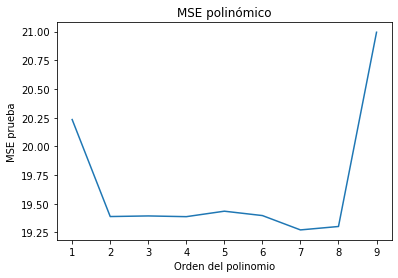

In [51]:
orders = range(1, 10)
mses = []
for order in orders:

    features = [np.ones_like( cars_train.weight )]
    for i in range(1,order+1):
        features.append( cars_train.weight.values**i )
    X = np.stack( features ).T
    y = cars_train.mpg.values

    beta = np.linalg.inv(X.T @ X) @ X.T @ y

    features = [np.ones_like( cars_test.weight )]
    for i in range(1,order+1):
        features.append( cars_test.weight.values**i )
    X_test = np.stack( features ).T

    test_mse = ((X_test @ beta - y_test)**2).mean()
    mses.append( test_mse )

plt.plot( orders, mses )
plt.xlabel("Orden del polinomio")
plt.ylabel("MSE prueba")
plt.title("MSE polinómico")

## Regresión lineal con `sklearn`

Construir las matrices $X$ y $y$

In [46]:
X = cars[["cylinders", "displacement", "horsepower", "weight", "acceleration", "american", "european", "asian"]]
y = cars["mpg"]

Dividir en conjuntos de entrenamiento y prueba

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

Ajustar con el conjunto de entrenamiento

In [48]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Predecir valores $y$ para el conjunto de prueba

In [49]:
yhat = model.predict(X_test)

Evaluar vs los valores conocidos

In [50]:
mse = mean_squared_error(y_test, yhat)
print(mse)
rmse = np.sqrt(mse)
print(rmse)

15.788810363214498
3.9735136042568797


El mejor modelo hasta ahora.  Pero ¿qué es lo que más influye en el consumo en  mpg?